<div align='Center'> 
    
# Построение многослойной искусственной сети

</div>

---

**Глубокое обучение** - это область машинного обучения, которая занимается обучением многослойных искусственных нейронных сетей (Neural Network, NN).

>нейронные сети невероятно популярны благодаря множеству научных
и технических прорывов, сделанных в предыдущее десятилетие. Они привели к созданию алгоритмов и архитектур глубокого обучения - многослойных нейронных сетей.

Примеры применения алгоритмов **глубокого обучения**:
* прогнозирование потребностей в ресурсах для борьбы с COVID-19 на основе серии
рентгеновских снимков;
* моделирование мутаций вируса;
* использование данных из социальных сетей для отслеживания экстремальных
погодных явлений.

---

<div align='Center'> 
    
## Знакомство с архитектурой многослойной нейронной сети

</div>

---


Первый тип `полносвязной сети` - **многослойный персептрон (Multilayer Perceptron, MLP)** - соединяющий несколько одиночных нейронов в многослойную нейронную сеть с прямым распространением сигнала.

**Структура и особенности MLP:**
* MLP состоит из входного слоя, одного скрытого и выходного слоя.
* Узлы каждого слоя полностью связаны с соседним слоем.
* Если скрытых слоев больше одного → это глубокая нейронная сеть.
* Количество слоев и нейронов — гиперпараметры, которые можно подобрать с помощью перекрестной проверки.
* **Проблема:** при увеличении числа слоев возникает исчезающий градиент, усложняющий обучение, для решения используются специальные алгоритмы глубокого обучения.

В нейросетях связи между входами и скрытым слоем удобно записывать не отдельными весами, а **матрицей весов** $W$ размерности $d \times m$, где $d$ — число скрытых нейронов, а $m$ — число входов. Умножая входной вектор $x$ на эту матрицу, мы сразу получаем взвешенные суммы для всех скрытых нейронов одной матричной операцией. 

### Активация нейронной сети прямого распространения (forward propagation)

#### Обучение MLP в общих чертах:

1. **Прямое распространение (forward propagation)** — входные данные проходят через слои сети и формируют выход.
2. **Вычисление ошибки (loss)** — сравниваем предсказание сети с правильным ответом.
3. **Обратное распространение (backpropagation)** — ошибка распространяется назад, вычисляются градиенты, обновляются веса и смещения.
   Эти шаги повторяются много раз (эпохи), пока модель не обучится.

#### Прямое распространение шаг за шагом

**1. Из входов в скрытый слой**

* Каждый нейрон скрытого слоя получает **линейную комбинацию входов**:

  $$
  z^{(h)} = x^{(in)} W^{(h)T} + b^{(h)}
  $$

  где:

  * $x^{(in)}$ — вектор входов,
  * $W^{(h)}$ — матрица весов (размер $d \times m$),
  * $b^{(h)}$ — смещения (по одному на каждый скрытый нейрон).

* Затем применяется **функция активации** (например, сигмоида):

  $$
  a^{(h)} = \sigma(z^{(h)})
  $$


**2. Из скрытого слоя в выходной слой**

* То же самое, но уже с активациями скрытого слоя:

  $$
  z^{(out)} = a^{(h)} W^{(out)T} + b^{(out)}
  $$
* И снова применяем активацию (например, сигмоиду):

  $$
  a^{(out)} = \sigma(z^{(out)})
  $$


#### Если несколько примеров сразу (матрицы)

* Вместо одного примера $x$ используем сразу **матрицу входов** (размер $n \times m$, где $n$ — количество примеров).
* Тогда результатом будет:

  * матрица скрытых активаций $A^{(h)}$ размером $n \times d$,
  * матрица выходов $A^{(out)}$ размером $n \times t$ (где $t$ — число выходных нейронов).



#### Главное

##### 1. Forward propagation (прямое распространение)

* **Назначение:** вычисление выхода сети по входным данным.
* **Процесс для одного слоя:**

  1. Умножение входов на матрицу весов и добавление смещений.
  2. Применение функции активации (например, сигмоида).
  3. Передача результата на следующий слой.
* **Особенности:**

  * Для нескольких примеров сразу используются **матричные операции**, что ускоряет вычисления.
  * Результатом является **выходной сигнал сети**, который используется для вычисления ошибки.

##### 2. Обучение сети и антиградиент

* **Назначение:** минимизация ошибки сети.
* **Процесс:**

  1. Вычисляем функцию потерь, сравнивая выход сети с правильными ответами.
  2. Определяем **градиент функции потерь** — направление наибольшего роста ошибки.
  3. Изменяем веса в направлении **антиградиента** (против градиента) для уменьшения ошибки:

  $$
  W \gets W - \eta \frac{\partial L}{\partial W}
  $$

  где $\eta$ — скорость обучения.
  
  4. Повторяем этот процесс через **обратное распространение (backpropagation)** для всех слоёв и много раз (эпохи), пока сеть не обучится.


---

<div align='Center'> 

## Практическая работа с MLP: классификация цифр MNIST

</div>

**Цель:** реализовать и обучить многослойную нейронную сеть для распознавания рукописных цифр из набора данных MNIST.

#### О наборе данных MNIST

* **Создатель:** Ян Лекун и другие.
* **Структура:**

  1. **train-images** — 60 000 обучающих изображений (разархивировано ~47 МБ).
  2. **train-labels** — 60 000 меток классов.
  3. **t10k-images** — 10 000 тестовых изображений (~7,8 МБ).
  4. **t10k-labels** — 10 000 тестовых меток.
* **Происхождение данных:** цифры написаны руками 250 человек (50 % старшеклассники, 50 % сотрудники Бюро переписи населения).

#### Загрузка данных

* Вместо ручного скачивания и конвертации файлов можно использовать функцию `fetch_openml` из библиотеки **scikit-learn**, которая упрощает получение MNIST как массива NumPy, эта функция загружает данные в виде объектов `DataFrame` и `Series` **pandas**.

#### Масштабирование изображений (попиксельно)

* Здесь «признак» — это **каждый пиксель изображения**.
* **Каждое изображение масштабируется отдельно**, так что все значения пикселей переводятся в диапазон [-1, 1].
* Разница: **масштабирование происходит внутри одного примера (изображения), а не по столбцам всей таблицы**.
* Это работает хорошо для изображений, потому что важно сохранить относительные различия пикселей внутри конкретного изображения, а не между всеми изображениями сразу.


In [3]:
# Стандартные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Для ML
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
# Загрузка данных
X, y = fetch_openml('mnist_784', version = 1,
                    return_X_y = True)
X = X.values
y = y.astype(int).values

In [5]:
# Проверка размеров массивов
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [6]:
# Преобразование пикселов к [-1 до 1]
# X = ((X / 255.) - 5.) * 2
X = (X / 255.) * 2 - 1


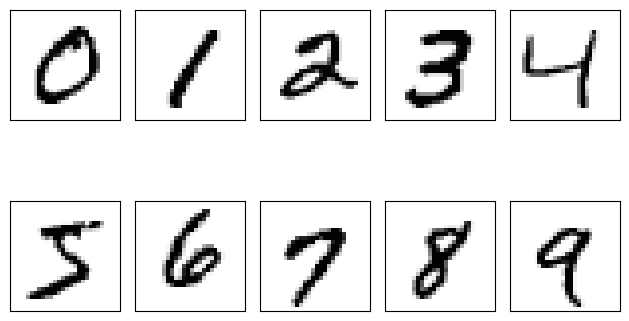

In [7]:
# Визуализация случайно выбранных цифр из каждого класса 
# от 0 до 9

fig, ax = plt.subplots(nrows = 2, ncols = 5,
                       sharex = True, sharey = True)
ax = ax.flatten()
for i in range(10):
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

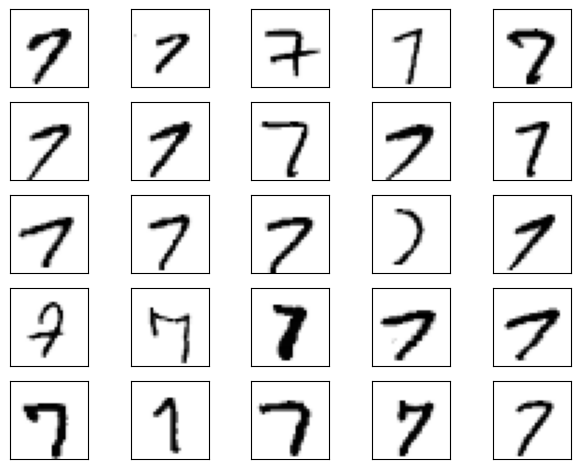

In [8]:
# Визуализация различных варинатов написания 
# одной и той же цифры
fig, ax = plt.subplots(nrows = 5, ncols = 5,
                       sharex = True, sharey = True)
ax = ax.flatten()
for i in range(25):
    img = X[y == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

>Разделим набор данных на обучающий - 55 тыс., валидационный - 5 тыс. и тестовый сегменты - 10 тыс.

В классическом машинном обучении (ML) часто используют **только две выборки**:

1. **Обучающая** — для обучения модели.
2. **Тестовая** — для оценки качества модели.

В таких случаях **валидацию делают иначе**:

* Через **кросс-валидацию** (cross-validation) — данные многократно делят на обучающие и тестовые блоки внутри обучающей выборки.
* Иногда гиперпараметры подбирают прямо на обучающей выборке, но это менее строго.

В глубоких нейронных сетях **использование отдельной валидационной выборки стало стандартом**, потому что:

* Модели очень сложные, легко переобучаются.
* Гиперпараметров (число слоев, нейронов, скорость обучения, регуляризация) много.
* Нужен быстрый способ проверить модель на «новых» данных **без трогания тестовой выборки**, чтобы финальная оценка была честной.

То есть **добавление отдельной валидационной выборки — это практика глубокого обучения**, которая обеспечивает более стабильное обучение и корректную настройку параметров.

In [9]:
# Разделение данных


# 1. Выделяем тестовую выборку
# X_test, y_test — тестовая выборка, на которой проверим финальную модель
# X_temp, y_temp — остаток данных (60 000 примеров) для обучения и валидации
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,            
    test_size=10000,  # Размер тестовой выборки: 10 000 примеров
    random_state=123, # Фиксируем генератор случайных чисел для воспроизводимости
    stratify=y        # Сохраняем пропорцию классов (0-9) в тестовой выборке
)


# 2. Делим оставшиеся данные на обучение и валидацию
# X_train, y_train — 55 000 примеров для обучения сети
# X_valid, y_valid — 5 000 примеров для валидации (настройка гиперпараметров, контроль переобучения)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp,       # Остаток данных после выделения тестовой выборки
    y_temp,
    test_size=5000,  # Размер валидационной выборки: 5 000 примеров
    random_state=123,# Чтобы разбиение было воспроизводимым
    stratify=y_temp  # Сохраняем пропорцию классов в валидационной выборке
)



---

## Реализация MLP: основные компоненты

### Вспомогательные функции

1. **Сигмоидная функция активации** — преобразует линейную комбинацию входов нейрона в значение в диапазоне [0,1].
2. **One-hot кодирование меток классов** — преобразует целочисленные метки (0–9) в вектор, где единица стоит на позиции класса, а остальные значения — 0.


### Класс `NeuralNetMLP`

Основной класс для реализации многослойного персептрона. Содержит три ключевых метода:

1. **`__init__()`**

   * Создаёт матрицы весов и векторы смещений для скрытого и выходного слоев.
   * Инициализация весов нужна для того, чтобы нейросеть могла начать обучение.

2. **`forward()`**

   * Принимает один или несколько примеров на вход.
   * Вычисляет активации скрытого слоя (`a_h`) и выходного слоя (`a_out`).
   * `a_out` — вероятности принадлежности к каждому классу, которые можно преобразовать в метки.
   * `a_h` — нужны для обратного распространения, чтобы обновлять веса и смещения.

3. **`backward()`**

   * Реализует **обратное распространение (backpropagation)**.
   * Вычисляет градиенты функции потерь по весам и смещениям.
   * Обновляет параметры с помощью **градиентного спуска**: веса меняются в направлении антиградиента, чтобы минимизировать ошибку.
   * На данном этапе используется **MSE (среднеквадратичная ошибка)**, но позже можно применять более сложные функции потерь, например **кросс-энтропию** для многоклассовой классификации.


### Зачем так устроено

* Разделение на методы `forward()` и `backward()` позволяет **понять, как информация проходит через сеть** и как она обучается.
* Объектно-ориентированная реализация схожа с подходами современных библиотек глубокого обучения (PyTorch, TensorFlow), где есть явное разделение **вычисление активаций** и **вычисление градиентов**.
* Такой подход делает код более наглядным и облегчает понимание сложных нейронных сетей.

---

In [10]:
# Реализация MLP с нуля для классификации MNIST 
# для простоты реализуем с одним слоем


# -----------------------------
# Вспомогательные функции
# -----------------------------
def sigmoid(z):
    # Сигмоидная функция активации
    # Преобразует любое значение в диапазон (0,1)
    return 1. / (1. + np.exp(-z))

def int_to_onehot(y, num_labels):
    # Преобразуем целые метки классов в one-hot кодирование
    # Например, для класса 3 из 10 получаем [0,0,0,1,0,0,0,0,0,0]
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

# -----------------------------
# Основной класс нейросети
# -----------------------------
class NeuralNetMLP:

    def __init__(self, num_features, num_hidden,
                 num_classes, random_seed = 123):
        # Конструктор: создаёт веса и смещения для скрытого и выходного слоев

        super().__init__()

        self.num_classes = num_classes

        rng = np.random.RandomState(random_seed)  # фиксируем генератор случайных чисел

        # --- скрытый слой ---
        # Веса размером [num_hidden, num_features]
        self.weight_h = rng.normal(loc=0.0, scale=0.1, size=(num_hidden, num_features))
        # Смещения скрытого слоя размером [num_hidden]
        self.bias_h = np.zeros(num_hidden)

        # --- выходной слой ---
        # Веса размером [num_classes, num_hidden]
        self.weight_out = rng.normal(loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        # Смещения выходного слоя размером [num_classes]
        self.bias_out = np.zeros(num_classes)

    # -----------------------------
    # Forward propagation
    # -----------------------------
    def forward(self, x):
        # x: входные данные размером [n_examples, n_features]

        # --- скрытый слой ---
        # Линейная комбинация входов + смещения
        # [n_examples, n_features] dot [n_hidden, n_features].T -> [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        # Применяем сигмоид
        a_h = sigmoid(z_h)

        # --- выходной слой ---
        # [n_examples, n_hidden] dot [n_classes, n_hidden].T -> [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)  # вероятности принадлежности к классам

        # Возвращаем активации скрытого и выходного слоев
        return a_h, a_out

    # -----------------------------
    # Backward propagation
    # -----------------------------
    def backward(self, x, a_h, a_out, y):
        # -------------------------------
        # Вычисление градиентов для обновления весов и смещений
        # -------------------------------

        # 1. Переводим y в one-hot представление
        y_onehot = int_to_onehot(y, self.num_classes)

        # -------------------------------
        # Часть 1: градиенты выходного слоя
        # -------------------------------
        # dLoss/dA_out (производная функции потерь по выходным активациям)
        d_loss__d_a_out = 2. * (a_out - y_onehot) / y.shape[0]

        # dA_out/dZ_out (производная сигмоиды)
        d_a_out__d_z_out = a_out * (1. - a_out)

        # "ошибка" выходного слоя (дельта)
        delta_out = d_loss__d_a_out * d_a_out__d_z_out

        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h

        # Градиент по весам выходного слоя: dLoss/dW_out
        # [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)

        # Градиент по смещениям выходного слоя: dLoss/db_out
        # [n_classes]
        d_loss__db_out = np.sum(delta_out, axis = 0)

        # -------------------------------
        # Часть 2: градиенты скрытого слоя
        # -------------------------------
        # dZ_out/dA_h = веса выходного слоя
        d_z_out__a_h = self.weight_out

        # dLoss/dA_h (как ошибка выходного слоя влияет на скрытый)
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)

        # dA_h/dZ_h (производная сигмоиды скрытого слоя)
        d_a_h__d_z_h = a_h * (1. - a_h)

        # dZ_h/dW_h = входной вектор X
        d_z_h__d_w_h = x

        # Градиент по весам скрытого слоя: dLoss/dW_h
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)

        # Градиент по смещениям скрытого слоя: dLoss/db_h
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis = 0)

        # -------------------------------
        # Возвращаем все градиенты
        # -------------------------------
        return (d_loss__dw_out, d_loss__db_out,
                d_loss__d_w_h, d_loss__d_b_h)


### Пояснения для понимания

1. **Forward**:

   * Сначала вычисляем линейные комбинации входов с весами и смещениями для скрытого слоя.
   * Потом применяем сигмоид.
   * Затем те же шаги для выходного слоя.
   * На выходе получаем `a_out` (вероятности) и `a_h` (для градиентов).

2. **Backward**:

   * Используем **формулу обратного распространения**: считаем, как ошибка сети зависит от каждого веса.
   * `delta_out` = «насколько выходной нейрон ошибся», корректируем веса выходного слоя.
   * Через веса выходного слоя «отправляем» ошибку обратно в скрытый слой.
   * Используем производную сигмоиды для корректировки градиентов.

3. **Важные моменты**:

   * Все вычисления выполняются через **матричные операции** для ускорения.
   * Градиенты возвращаются, чтобы потом обновить веса методом **градиентного спуска**.
   * Этот подход легко масштабируется на несколько слоев и примеров одновременно.

In [11]:
# Инициализация модели
model = NeuralNetMLP(num_features = 28 * 28,
                     num_hidden = 50,
                     num_classes = 10)

---

## Настройка и обучение MLP для MNIST

### 1. Настройка модели

* **Входные данные**: изображения MNIST, развернутые в 784-мерные векторы (28×28 пикселей → 784).

  * Используются массивы: `x_train`, `x_valid`, `x_test`.
* **Классы**: 10 целочисленных меток (0–9).
* **Скрытый слой**: 50 узлов.
* **Функция активации**: сигмоида, применяется после скрытого и выходного слоев.
* **Выход**: вероятности принадлежности к каждому из 10 классов.

> позже будут рассмотрены более продвинутые функции активации для скрытого и выходного слоев, которые могут работать лучше на сложных задачах.


### 2. Подготовка данных

* MNIST уже разделён на тренировочные, валидационные и тестовые наборы.
* Каждое изображение представлено вектором из 784 признаков.

### 3. Обучение с мини-пакетами

* Данные передаются в специальную **функцию генератора мини-пакетов**, которая делит их на небольшие порции нужного размера для обучения.
* Это важно, потому что использование **мини-пакетов** вместо всего набора данных сразу:

  * ускоряет обучение;
  * делает обновление весов более стабильным;
  * позволяет лучше использовать память и вычислительные ресурсы.
* Каждая итерация мини-пакета включает:

  1. **Forward propagation** — вычисление выхода сети для мини-пакета.
  2. **Backward propagation** — вычисление градиентов и обновление весов методом градиентного спуска.
* Проход по всем мини-пакетам = одна эпоха; несколько эпох = полные проходы по всему тренировочному набору.

> Теперь мы готовы **обучить MLP**, используя мини-пакеты и стохастический градиентный спуск для оптимизации весов сети.

---

In [16]:
# Генератор мини-пакетов
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        yield X[batch_idx], y[batch_idx]

In [17]:
# Постепенное вычисление MSE и точности, перебирая набор данных 
# по одному мини-пакету за раз, чтобы повысить эффективность
# использования памяти

def compute_mse_and_acc(nnet, X, y, num_labels = 10,
                        minibatch_size = 100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
    for i, (features, targets) in enumerate(minibatch_gen):
        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis = 1)
        onehot_targets = int_to_onehot(
            targets, num_labels=num_labels
        )
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        num_examples += targets.shape[0]
        mse += loss
    mse = mse/i
    acc = correct_pred/num_examples
    return mse, acc


In [18]:
# Цикл для обучения модели
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate = 0.1):
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []

    for e in range(num_epochs):
        # Итерация по мини-пакетам
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)
        for X_train_mini, y_train_mini in minibatch_gen:
            # Вычисление выходов
            a_h, a_out = model.forward(X_train_mini)

            # Вычисление градиентов
            d_loss__d_w_out, d_loss__d_b_out, \
            d_loss__d_w_h, d_loss__d_b_h = \
            model.backward(X_train_mini, a_h, a_out, y_train_mini)

            # Обновление весов
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out


        # Ведение журнала эпох
        train_mse, train_acc = compute_mse_and_acc(
            model, X_train, y_train
        )
        valid_mse, valid_acc = compute_mse_and_acc(
            model, X_valid, y_valid
        )
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Эпоха: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid ACC: {valid_acc:.2f}%')
        
    return epoch_loss, epoch_train_acc, epoch_valid_acc

In [19]:
np.random.seed(123) # Перемешивание обучающего набора
epoch_loss, epoch_train_acc, epoch_valid_acc = train(
    model, X_train, y_train, X_valid, y_valid,
    num_epochs = 50, learning_rate = 0.1)

Эпоха: 001/050 | Train MSE: 0.05 | Train Acc: 76.15% | Valid ACC: 75.98%
Эпоха: 002/050 | Train MSE: 0.03 | Train Acc: 85.45% | Valid ACC: 85.04%
Эпоха: 003/050 | Train MSE: 0.02 | Train Acc: 87.82% | Valid ACC: 87.60%
Эпоха: 004/050 | Train MSE: 0.02 | Train Acc: 89.36% | Valid ACC: 89.28%
Эпоха: 005/050 | Train MSE: 0.02 | Train Acc: 90.21% | Valid ACC: 90.04%
Эпоха: 006/050 | Train MSE: 0.02 | Train Acc: 90.67% | Valid ACC: 90.54%
Эпоха: 007/050 | Train MSE: 0.02 | Train Acc: 91.12% | Valid ACC: 90.82%
Эпоха: 008/050 | Train MSE: 0.02 | Train Acc: 91.43% | Valid ACC: 91.26%
Эпоха: 009/050 | Train MSE: 0.01 | Train Acc: 91.84% | Valid ACC: 91.50%
Эпоха: 010/050 | Train MSE: 0.01 | Train Acc: 92.04% | Valid ACC: 91.84%
Эпоха: 011/050 | Train MSE: 0.01 | Train Acc: 92.30% | Valid ACC: 92.08%
Эпоха: 012/050 | Train MSE: 0.01 | Train Acc: 92.51% | Valid ACC: 92.24%
Эпоха: 013/050 | Train MSE: 0.01 | Train Acc: 92.65% | Valid ACC: 92.30%
Эпоха: 014/050 | Train MSE: 0.01 | Train Acc: 92.80

---

## Итог по реализации обучения MLP:

1. `compute_mse_and_acc`

* Вместо того, чтобы сразу прогонять через сеть **весь датасет** (что может не поместиться в память), мы используем **генератор мини-пакетов**.
* Каждый мини-пакет отдельно проходит через сеть → мы считаем MSE и точность на нём.
* В конце усредняем результаты → получаем итоговую оценку на всём наборе.
  📌 Это экономит память и имитирует «пошаговое» обучение, ближе к реальности.

2. `train`

* Обучение идёт по **эпохам**. Каждая эпоха = один полный проход по обучающему набору.

* Внутри эпохи мы берём данные кусочками (мини-пакетами) и:

  1. Прямой проход → `forward` (получаем предсказания).
  2. Обратный проход → `backward` (считаем градиенты).
  3. Обновляем веса:

     $$
     W := W - \eta \frac{\partial L}{\partial W}
     $$

     где $\eta$ — скорость обучения.

* После каждой эпохи вычисляем и выводим:

  * **ошибку (MSE)** и **точность** на обучающем наборе,
  * то же самое на **валидационном наборе**.

3. Зачем печатаем метрики?

* Чтобы отслеживать процесс: сеть учится или нет.
* Если точность на train высокая, а на valid остаётся низкой → **переобучение**.
* Если и там и там низкая → либо сеть слишком простая, либо гиперпараметры плохие.
* Это помогает вовремя принять решение:

  * поменять архитектуру,
  * изменить скорость обучения,
  * применить регуляризацию,
  * или остановить обучение раньше (**early stopping**).

В итоге получилась минимальная, но рабочая схема обучения MLP «с нуля» — с мини-пакетами, градиентным спуском и мониторингом метрик. Это именно та базовая логика, на которой построены все современные фреймворки (PyTorch, TensorFlow), только там это автоматизировано.

---

## Оценка производительности нейронной сети

В функции `train()` мы собрали потери **MSE** при обучении, а также точность модели на обучающем и валидационном наборах данных для каждой эпохи. Визуализируем это. 

---

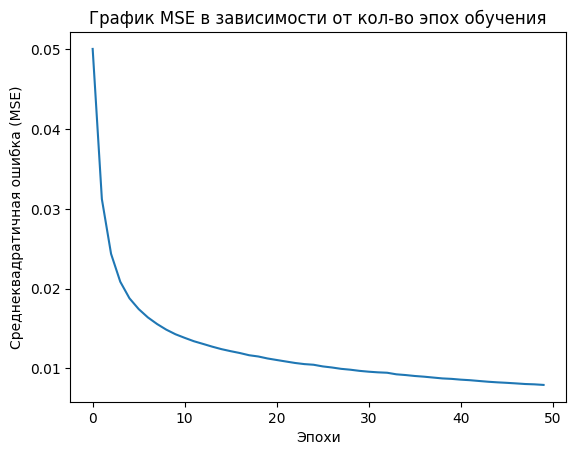

In [21]:
# График потерь по метрикам MSE при обучении
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Среднеквадратичная ошибка (MSE)')
plt.xlabel('Эпохи')
plt.title('График MSE в зависимости от кол-во эпох обучения')
plt.show()

> Как можно здесь видеть, потери существенно уменьшились в течение первых 1О эпох и,
очевидно, модель медленно сходится в последние 10 эпох. Однако небольшой наклон
между эпохами 40 и 50 указывает на то, что потери могут уменьшиться при обучении
в течение дополнительных эпох.

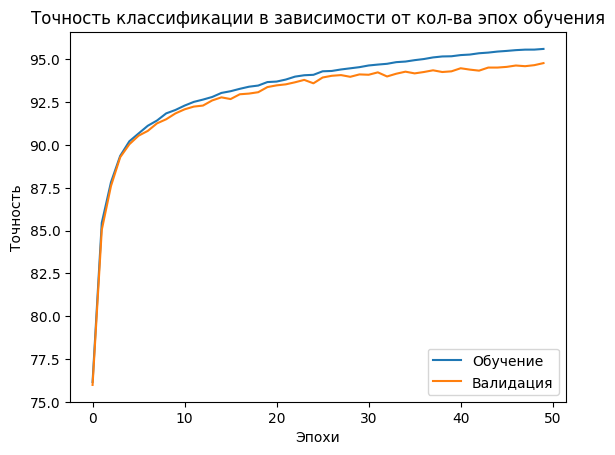

In [24]:
# График точности модели на обучающем и валидационном наборе
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label = 'Обучение')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label = 'Валидация')
plt.ylabel('Точность')
plt.xlabel('Эпохи')
plt.legend(loc = 'lower right')
plt.title('Точность классификации в зависимости от кол-ва эпох обучения')
plt.show()


---

#### Обобщённый вывод:

* По мере увеличения числа эпох сеть **лучше запоминает обучающие данные** → точность на train растёт.
* Но на **валидации** после какого-то момента точность перестаёт расти и даже начинает снижаться → это и есть **переобучение**.
* В нашем случае первые признаки видны примерно после 25-й эпохи, когда train ≈ valid, а дальше появляется разрыв.

#### Борьба с переобучением:

1. **Регуляризация L2 (weight decay)**
   Добавляем штраф к весам, чтобы сеть не подгоняла слишком сильно каждый параметр.

2. **Dropout**
   Во время обучения случайно «выключаем» часть нейронов, чтобы модель не училась на избыточных связях.

3. **Early stopping**
   Прекращаем обучение в тот момент, когда валидационная ошибка начинает расти, даже если train продолжает улучшаться.

4. **Увеличение данных**
   Если возможно, добавить больше обучающих примеров или сделать аугментацию.

---

Оценим способность модели к обобщению, рассчитав точность прогноза на тестовом наборе данных.

In [26]:
# Точность для тестового набора данных
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Точность при тестировании: {test_acc*100:.2f}%')

Точность при тестировании: 94.54%


Как можно заметить, точность на тесте очень близка к точности при валидации на последней эпохе (94.78%), более того, точность на обучающих данных лишь немного выше (95.61%). Это подтверждает предположение о том, что наша модель склонна переобучаться, но совсем незначительно. Для дальнейшей точной настройки модели могли бы изменить кол-во скрытых узлов, скорость обучения или использовать другие приемы, но это выходит за рамки данной темы.

К другим **распространенным приемам**, которые выходят за рамки этой темы, относятся:
* добавление сквозных соединений, которые являются главной особенностью архи­
тектуры остаточных нейронных сетей;
* использование планировщиков скорости, изменяющих скорость обучения непосред­
ственно во время обучающего процесса;
* присоединение функций потерь к более ранним уровням в сетях, как это делается
в популярной архитектуре Inception v3.

---

Посмотрим на примеры изображений, с которыми не смог справиться наш MLP. Для этого извлечем и отобразим первые 25 неправильно классифицированных изображений из тестового набора.

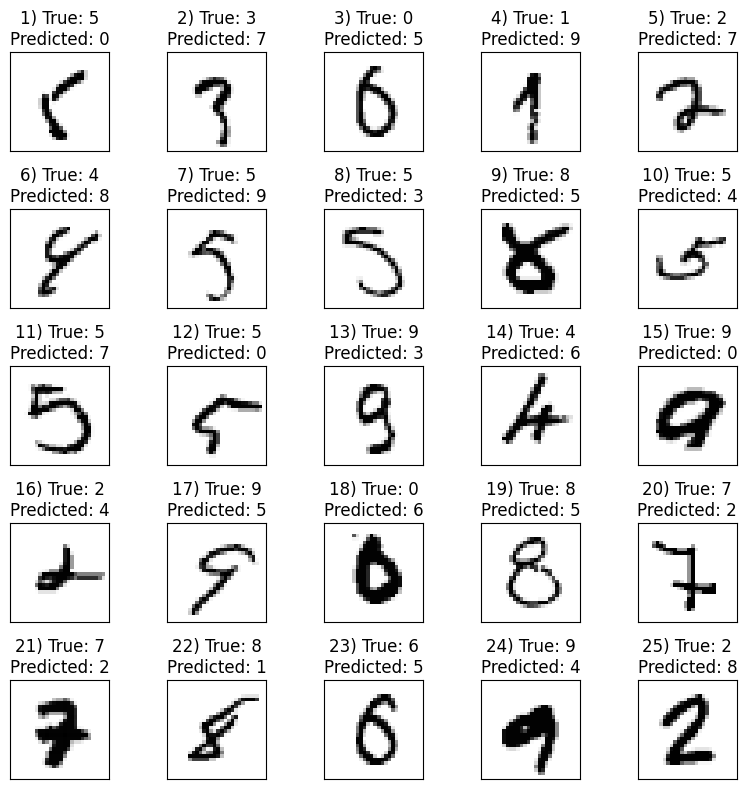

In [28]:
# Просмотр цифр, которая модель не смогла классифицировать
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]
_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)
misclassified_images = \
    X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

fig, ax = plt.subplots(nrows = 5, ncols = 5,
                       sharex = True, sharey = True,
                       figsize = (8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation = 'nearest')
    ax[i].set_title(f'{i + 1}) '
                    f'True: {correct_labels[i]}\n'
                    f'Predicted: {misclassified_labels[i]}') 
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

На этой матрице изображения, первое число в подзаголовках указывает номер примера **(индекс)**, второе число представляет собой метку истинного класса **(True)**, а третье число обозначает метку прогнозируемого класса **(Predicted)**.

Как можно здесь видеть, сеть, среди прочего, не способна распознавать семерки, когда
они содержат горизонтальную линию, как в примерах 20 и 21, мы можем предположить, что
написанная от руки цифра 7 с горизонтальной линией недостаточно часто встречается
в нашем наборе данных и модель просто не научилась ее уверенно распознавать.

---

<div align='Center'> 
    
## Обучение искусственной нейронной сети

</div>

---

## Вычилсение функции потерь

Для многоклассовой классификации наша модель MLP возвращает вектор предсказаний $a^{(out)}$, который сравнивается с целевым вектором $y$ в one-hot кодировке.

Функция потерь служит мерой расхождения между предсказанием модели и правильной меткой. В данном случае используется **среднеквадратичная ошибка (MSE)**, которая вычисляется как среднее по всем классам $t$ и по всем примерам в обучающем наборе или мини-пакете $n$:

$$
L(W, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{t} \sum_{j=1}^t (y_j^{(i)} - a_j^{(out)(i)})^2
$$

Где:

* $y_j^{(i)}$ — целевое значение (0 или 1) для класса $j$ в примере $i$,
* $a_j^{(out)(i)}$ — предсказанная вероятность для класса $j$,
* $W, b$ — параметры модели (матрицы весов и смещения).

Задача обучения нейросети — **минимизировать функцию потерь $L(W)$**, подбирая веса таким образом, чтобы предсказания $a^{(out)}$ максимально приближались к целевым значениям $y$.

Для этого необходимо вычислять **градиенты** функции потерь по весам и смещениям на каждом слое сети. Именно эти частные производные используются для обновления параметров при градиентном спуске.

В MLP с одним скрытым слоем у нас есть две матрицы весов:

* $W^{(h)}$ — соединяет входной слой со скрытым,
* $W^{(out)}$ — соединяет скрытый слой с выходным.

---

Далее мы разберем алгоритм **обратного распространения ошибки (backpropagation)**, который позволяет эффективно вычислять эти градиенты.

---

## Подробнее о механизме обратного распространения

Алгоритм обратного распространения ошибки — это **эффективный способ вычисления частных производных** функции потерь по параметрам многослойной нейронной сети. Эти производные нужны для обновления весов во время обучения.

В отличие от простых моделей (например, логистической регрессии или Adaline), функция потерь нейросети является **сложной, невыпуклой** и имеет множество локальных минимумов. Поэтому для оптимизации требуется метод, позволяющий быстро находить производные в многомерном пространстве параметров.

Ключевая идея основана на **цепном правиле дифференцирования**: производная сложной вложенной функции вычисляется как последовательное умножение производных каждой вложенной части.

Обратное распространение можно рассматривать как частный случай **автоматического дифференцирования в обратном режиме**. Вместо того чтобы вычислять большие матричные якобианы (что очень затратно), алгоритм выполняет проход от выхода к входу, пошагово умножая матрицы на векторы. Такое представление делает процесс **намного быстрее и эффективнее**, чем прямое применение цепного правила.

Именно благодаря этой оптимизации backprop стал основным методом обучения нейронных сетей.

---

## Обучение нейронных сетей с помощью обратного распространения

Чтобы обучить многослойную нейронную сеть, нужно обновлять веса так, чтобы минимизировать функцию потерь. Для этого используется **алгоритм обратного распространения ошибки (backpropagation)**.

Механизм работы можно разделить на два шага:

1. **Прямое распространение** — входные данные проходят через слои сети: вычисляются линейные комбинации входов и активации (например, через сигмоиду). На выходе получаем прогноз.
2. **Обратное распространение** — ошибка (разница между прогнозом и целевыми значениями) передаётся обратно через сеть с помощью **цепного правила дифференцирования**. Это позволяет вычислить градиенты функции потерь по каждому параметру (весу и смещению).

Например, для одного веса в выходном слое градиент вычисляется как произведение трёх компонентов:

* производной функции потерь по активации,
* производной функции активации (сигмоиды) по входу,
* производной входа по весу.

Объединяя эти части, получаем формулу градиента, которую используем для обновления веса методом градиентного спуска:

$$
W \leftarrow W - \eta \cdot \frac{\partial L}{\partial W}
$$

где $\eta$ — скорость обучения.

Для удобства вычислений часто вводится промежуточная переменная **δ (дельта)**, которая хранит локальную ошибку на каждом слое. Эти δ передаются от выходного слоя к скрытым слоям, что позволяет эффективно вычислять все градиенты.

Таким образом, backpropagation позволяет шаг за шагом обновлять параметры сети так, чтобы она всё лучше приближала правильные ответы.

---

## О сходимости в нейронных сетях

При обучении многослойных нейронных сетей часто используется **мини-пакетное обучение** (mini-batch learning), которое является частным случаем **стохастического градиентного спуска (SGD)**.

* В **обычном градиентном спуске** градиент вычисляется на основе всего обучающего набора, что может быть медленно для больших данных.
* В **онлайн-обучении (SGD)** градиент вычисляется на основе одного примера за раз, что даёт быструю сходимость, но градиенты сильно шумные.
* **Мини-пакетное обучение** использует небольшие подмножества данных (1 < k < n), что сочетает преимущества обоих подходов:

  * Векторизация ускоряет вычисления.
  * Обновления весов происходят быстрее, чем при полном градиентном спуске.
  * «Шум» градиентов помогает избежать локальных минимумов на сложной поверхности функции потерь.

Многослойные сети имеют сотни или тысячи весов, а поверхность функции потерь обычно **неровная и сложная**.

* Слишком маленькая скорость обучения может привести к застреванию в локальных минимумах.
* Слишком большая скорость обучения может «проскакивать» глобальный оптимум.
* Случайная инициализация весов помогает начать обучение с разнообразных точек и повысить шанс успешной сходимости.

Таким образом, мини-пакетный градиентный спуск обеспечивает **баланс между скоростью обучения, стабильностью и шансом найти хорошие решения** в многомерной и сложной функции потерь нейросети.

---

## Несколько заключительных слов о реализации нейронной сети

Реализация MLP с нуля позволила понять **основы работы нейронных сетей**, включая прямое распространение и обратное распространение ошибки.

Хотя для классификации рукописных цифр можно было бы сразу воспользоваться готовыми библиотеками, такими как **scikit-learn (MLPClassifier)**, самостоятельная реализация полезна для:

* понимания того, как вычисляются градиенты и обновляются веса;
* осознания структуры многослойной сети и роли функций активации;
* подготовки к более сложным моделям глубокого обучения.

Дальнейшее изучение будет связано с использованием **PyTorch**, которая:

* облегчает создание и обучение глубоких нейросетей;
* оптимизирует вычисления с многомерными массивами;
* позволяет эффективно использовать графические процессоры (GPU) для ускорения обучения.

Таким образом, пройденная практика с «ручной» реализацией MLP закладывает **теоретическую и практическую основу** для работы с современными инструментами глубокого обучения.